In [2]:
import seaborn as sns
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/niteen11/DataAnalyticsAcademy/master/Python/dataset_diabetes/diabetic_data.csv')

In [4]:
df.head()
#EDA CDC diabetes data has several metrics that can be observed.
#According to the CDC dictionary change column indicates a change in diabetic medication whether it be from brand to generic medication or a dosage change.
#First initial comparison point is whether there is a correlation between a change in diabetic medication ('change' column) and the number of days between readmission ('readmitted' column).
#A head() function is performed to see the column heads and the number of columns get an idea of what is included in the dataset.

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [5]:
df.tail()
#A tail() function is performed to see the number of rows in the dataset as well as get a bigger picture of the data.

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO
101765,443867222,175429310,Caucasian,Male,[70-80),?,1,1,7,6,...,No,No,No,No,No,No,No,No,No,NO


In [6]:
df.columns
#This function shows all column headers in the dataset as well as the data types included in each column. Also useful when creating list to drop columns.

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [7]:
#cleaning data
#Will remove all unnecessary columns not needed for analysis with drop() function, will first create a list with all columns intended for dropping
drop_cols = ['weight', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id','payer_code', 'medical_specialty', 'num_lab_procedures', 
             'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses', 
             'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 
             'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'glyburide-metformin', 
             'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone']
df.drop(drop_cols, inplace = True, axis=1)


In [8]:
#Perform head() function to see new table with dropped columns.
df.head()

,encounter_id,patient_nbr,race,gender,age,time_in_hospital,insulin,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),1,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),3,Up,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),2,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),2,Up,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),1,Steady,Ch,Yes,NO


In [9]:
#Look at shape of cleaned up dataframe
df.shape

(101766, 10)

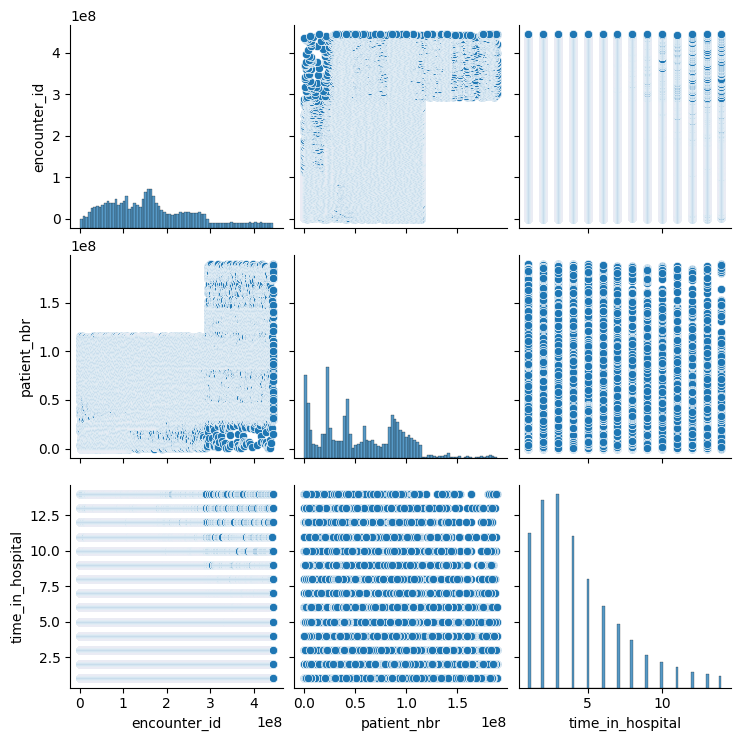

In [18]:
#Finding the best seaborn plot to show the relationship between hospital readmissions and change in medication
sns.pairplot(df)

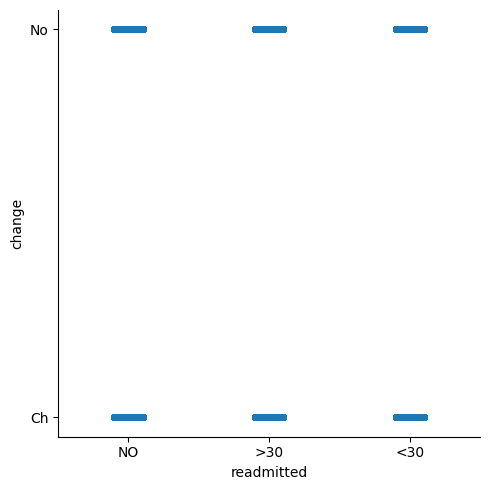

In [23]:
sns.catplot(data=df, x="readmitted", y="change")

In [25]:
#Since there are a large number of rows, attempting to populate a swarmplot has led to extensive runtimes.
#Hopefully filtering the data to only show data for patients whose medication was changed, represented by change column = "ch", this will improve lag time when creating more effective visualizations.
newdf = df[(df.change == "Ch")]

In [26]:
#New dataframe should have less rows
newdf.shape

(47011, 10)

In [27]:
newdf.head()

,encounter_id,patient_nbr,race,gender,age,time_in_hospital,insulin,change,diabetesMed,readmitted
1,149190,55629189,Caucasian,Female,[10-20),3,Up,Ch,Yes,>30
3,500364,82442376,Caucasian,Male,[30-40),2,Up,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),1,Steady,Ch,Yes,NO
6,55842,84259809,Caucasian,Male,[60-70),4,Steady,Ch,Yes,NO
8,12522,48330783,Caucasian,Female,[80-90),13,Steady,Ch,Yes,NO


<Axes: xlabel='readmitted', ylabel='time_in_hospital'>

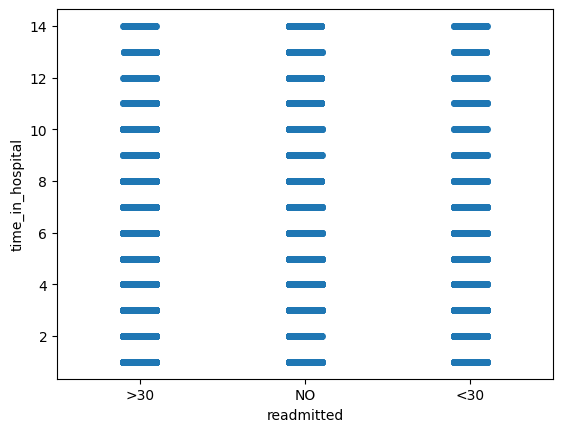

In [32]:
#with a new dataframe, let's observe the number of days a patient is in the hospital (time_in_hospital); 
#and whether the patient is readmitted to the hospital <30 days or >30 days after initial inpatient stay (readmitted)
sns.stripplot(x="readmitted",
 y="time_in_hospital", 
 data=newdf)

<Axes: xlabel='readmitted', ylabel='time_in_hospital'>

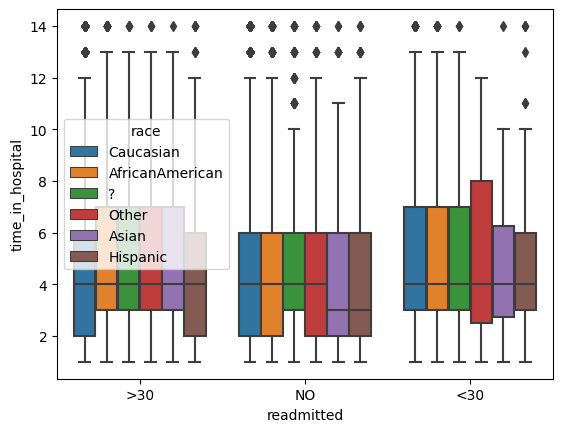

In [33]:
#The strip plot above could be showing there is no correlation between whether a patient is readmitted and how long they are readmitted after their initial stay and number of days spent in the hospital.
#The visualization may also be showing that this is not the most effective way to display this data.
sns.boxplot(x="readmitted",
 y="time_in_hospital",
 hue="race",
 data=newdf)

In conclusion, the box plot represents the data and relationship between number of days spent in the hospital (time_in_hospital) and number of days patients are readmitted after their initial inpatient stay (readmitted) more clearly than the strip plot. In this visualization you can see that patients who are not readmitted to the hospital on average spend less days in the hospital than those patients that are readmitted more or less than 30 days after their initial inpatient stay. 

I also broke down this analysis by race to observe that in the no readmission group, there is little to no difference in the race of a patient and their time in hospital. However, in the >30 day readmission group the Caucasian and Hispanic groups average less time in hospital (2-6 days) than the African-American, Asian, and other groups (3-7 days). Also, the < 30 days readmission group has more variation in the time in the hospital with the "Other" group number of days in hospital range from 3-8 days.